# **NETFLIX STOCK PRICE PREDICTION**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Dropout, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
import yfinance as yf
df = yf.download('NFLX', start='2019-01-01', end='2024-12-01')

df = df.reset_index()
df = df.sort_values(by='Date')


[*********************100%***********************]  1 of 1 completed


In [ ]:
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()

scaled_features = scaler_features.fit_transform(df[features])
scaled_target = scaler_target.fit_transform(df[[target]])

In [ ]:
def prepare_data(features, target, time_steps=50):
    X, y = [], []
    for i in range(len(features) - time_steps):
        X.append(features[i:i + time_steps])
        y.append(target[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 50
X, y = prepare_data(scaled_features, scaled_target, time_steps=time_steps)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
def build_and_evaluate_model(model_type, X_train, y_train, X_test, y_test, epochs=50, batch_size=32):
    model = Sequential()
    if model_type == 'LSTM':
        model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
        model.add(Dropout(0.2))
        model.add(LSTM(50))
    elif model_type == 'GRU':
        model.add(GRU(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
        model.add(Dropout(0.2))
        model.add(GRU(50))
    elif model_type == 'SimpleRNN':
        model.add(SimpleRNN(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
        model.add(Dropout(0.2))
        model.add(SimpleRNN(50))
    elif model_type == 'DNN':
        model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1] * X_train.shape[2],)))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(1))
        X_train = X_train.reshape(X_train.shape[0], -1)
        X_test = X_test.reshape(X_test.shape[0], -1)
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0.2)

    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)

    return model, predictions, {'MSE': mse, 'MAE': mae, 'RMSE': rmse, 'R2': r2}, history


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step - loss: 0.0273 - val_loss: 0.0024
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0024 - val_loss: 8.5706e-04
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0015 - val_loss: 9.5198e-04
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0016 - val_loss: 7.7959e-04
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0016 - val_loss: 7.6774e-04
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 0.0012 - val_loss: 7.1934e-04
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 0.0012 - val_loss: 6.9922e-04
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0012 - val_loss: 7.0454e-04
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0011 - val_loss: 7.3967e-04
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0011 - val_loss: 6.5334e-04
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0011 - val_loss: 7.0495e-04
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - loss: 0.0122 - val_loss: 4.3156e-04
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0.0012 - val_loss: 4.2023e-04
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - loss: 9.3856e-04 - val_loss: 4.1232e-04
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0010 - val_loss: 4.5220e-04
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 8.6640e-04 - val_loss: 3.8737e-04
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 7.8425e-04 - val_loss: 3.9579e-04
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 7.7979e-04 - val_loss: 3.8156e-04
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 9.6287e-04 - val_loss: 4.0331e-04
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 8.0960e-04 - val_loss: 3.6451e-04
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 7.9804e-04 - val_loss: 3.7544e-04
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 7.9133e-04 - val_loss: 4.3431e

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.1055 - val_loss: 0.0029
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0151 - val_loss: 0.0013
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0071 - val_loss: 0.0049
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0053 - val_loss: 0.0010
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0040 - val_loss: 0.0017
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0034 - val_loss: 9.8376e-04
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0030 - val_loss: 9.2556e-04
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0025 - val_loss: 9.4606e-04
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0025 - val_loss: 0.0011
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0018 - val_loss: 5.6360e-04
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0493 - val_loss: 0.0020
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0022 - val_loss: 0.0012
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013 - val_loss: 8.9919e-04
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - val_loss: 9.5927e-04
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.8505e-04 - val_loss: 6.2913e-04
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.5478e-04 - val_loss: 8.2452e-04
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.7372e-04 - val_loss: 6.2562e-04
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.6396e-04 - val_loss: 6.1228e-04
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.4349e-04 - val_loss: 4.8146e-04
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.6440e-04 - val_loss: 5.0559e-04
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.6287e-04 - val_loss: 5.0094e-04
Epoch 12/50
29/29 ━━━

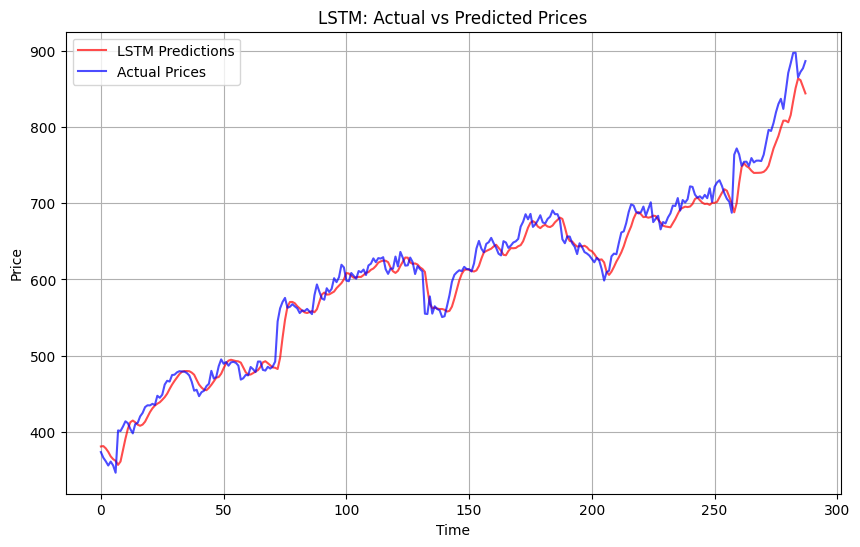

LSTM Metrics:
  MSE: 0.0007
  MAE: 0.0180
  RMSE: 0.0258
  R2: 0.9728


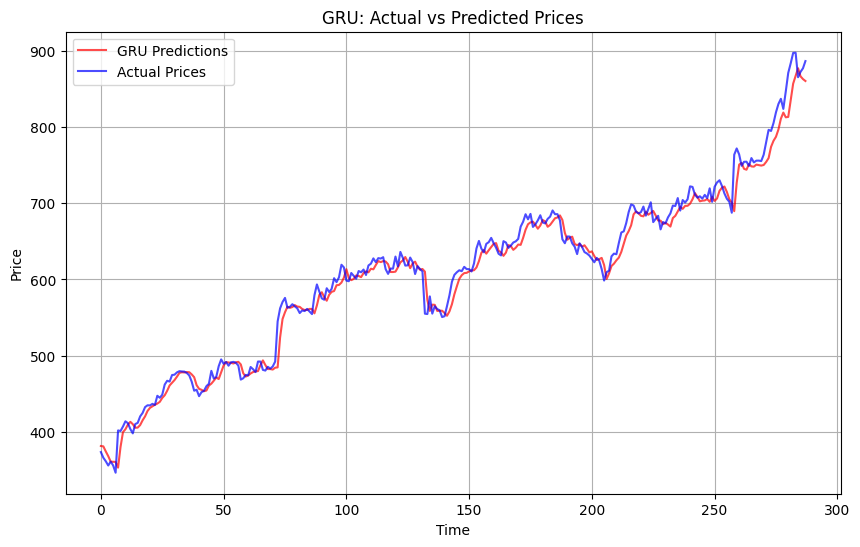

GRU Metrics:
  MSE: 0.0004
  MAE: 0.0147
  RMSE: 0.0207
  R2: 0.9824


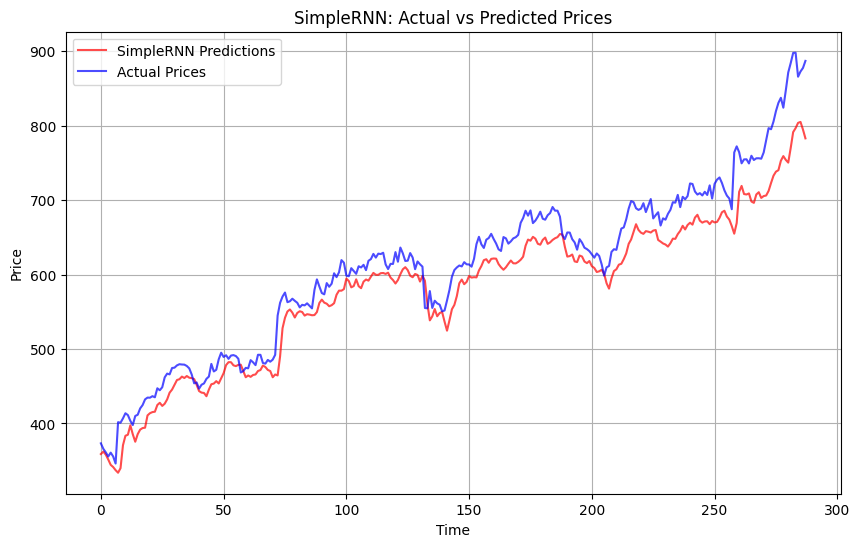

SimpleRNN Metrics:
  MSE: 0.0026
  MAE: 0.0423
  RMSE: 0.0514
  R2: 0.8918


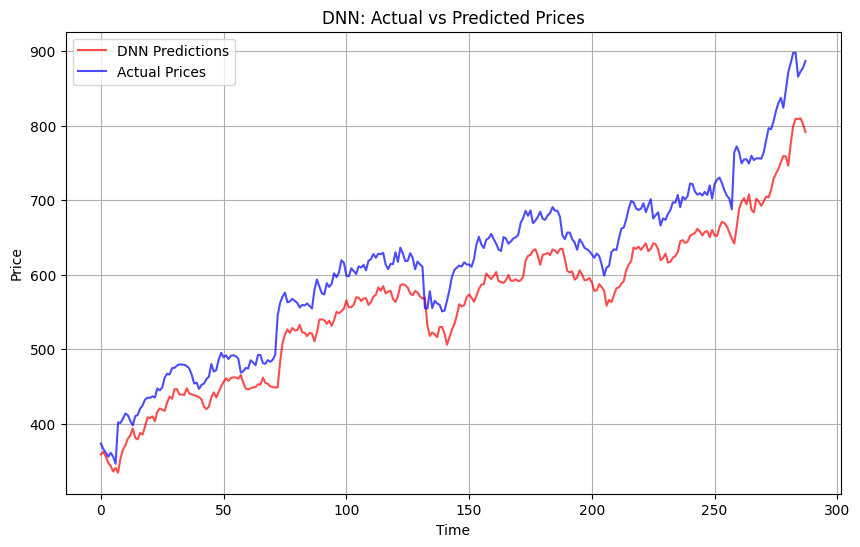

DNN Metrics:
  MSE: 0.0051
  MAE: 0.0660
  RMSE: 0.0712
  R2: 0.7924


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Initialize the results dictionary
results = {}
models = ['LSTM', 'GRU', 'SimpleRNN', 'DNN']

for model_type in models:
    # Build and evaluate the model
    model, predictions, metrics, history = build_and_evaluate_model(model_type, X_train, y_train, X_test, y_test)

    # Calculate additional metrics if not already included
    if 'RMSE' not in metrics:
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        metrics['RMSE'] = rmse
    if 'MAE' not in metrics:
        mae = mean_absolute_error(y_test, predictions)
        metrics['MAE'] = mae

    # Store all results
    results[model_type] = {
        'model': model,
        'predictions': predictions,
        'metrics': metrics,
        'history': history
    }

# Generate comparative metrics table
metrics_table = pd.DataFrame({
    model_type: results[model_type]['metrics'] for model_type in models
}).T

print("\n=== Model Comparison Metrics ===")
print(metrics_table)

# Plot predictions vs. actual for each model
for model_type in models:
    plt.figure(figsize=(10, 6))

    # Inverse-transform predictions and actual values
    predicted_prices = scaler_target.inverse_transform(results[model_type]['predictions'].reshape(-1, 1))
    actual_prices = scaler_target.inverse_transform(y_test.reshape(-1, 1))

    # Plot actual vs. predictions
    plt.plot(predicted_prices, label=f"{model_type} Predictions", color="red", alpha=0.7)
    plt.plot(actual_prices, label="Actual Prices", color="blue", alpha=0.7)
    plt.title(f"{model_type}: Actual vs Predicted Prices")
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"{model_type} Metrics:")
    for metric, value in results[model_type]['metrics'].items():
        print(f"  {metric}: {value:.4f}")


In [ ]:
# Create a DataFrame for evaluation metrics
import pandas as pd

# Prepare the metrics for each model
metrics_data = {
    "Model": ['LSTM', 'GRU', 'SimpleRNN', 'DNN'],
    "MSE": [results['LSTM']['metrics']['MSE'], results['GRU']['metrics']['MSE'], results['SimpleRNN']['metrics']['MSE'], results['DNN']['metrics']['MSE']],
    "MAE": [results['LSTM']['metrics']['MAE'], results['GRU']['metrics']['MAE'], results['SimpleRNN']['metrics']['MAE'], results['DNN']['metrics']['MAE']],
    "RMSE": [results['LSTM']['metrics']['RMSE'], results['GRU']['metrics']['RMSE'], results['SimpleRNN']['metrics']['RMSE'], results['DNN']['metrics']['RMSE']],
    "R²": [results['LSTM']['metrics']['R2'], results['GRU']['metrics']['R2'], results['SimpleRNN']['metrics']['R2'], results['DNN']['metrics']['R2']]
}

# Create a DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Format the table for better presentation
metrics_df = metrics_df.style.format({
    "MSE": "{:.5f}",
    "MAE": "{:.5f}",
    "RMSE": "{:.5f}",
    "R²": "{:.4f}"
})

# Display the metrics table
metrics_df

,Model,MSE,MAE,RMSE,R²
0,LSTM,0.00066,0.01802,0.02576,0.9728
1,GRU,0.00043,0.01470,0.02075,0.9824
2,SimpleRNN,0.00264,0.04233,0.05140,0.8918
3,DNN,0.00507,0.06598,0.07120,0.7924


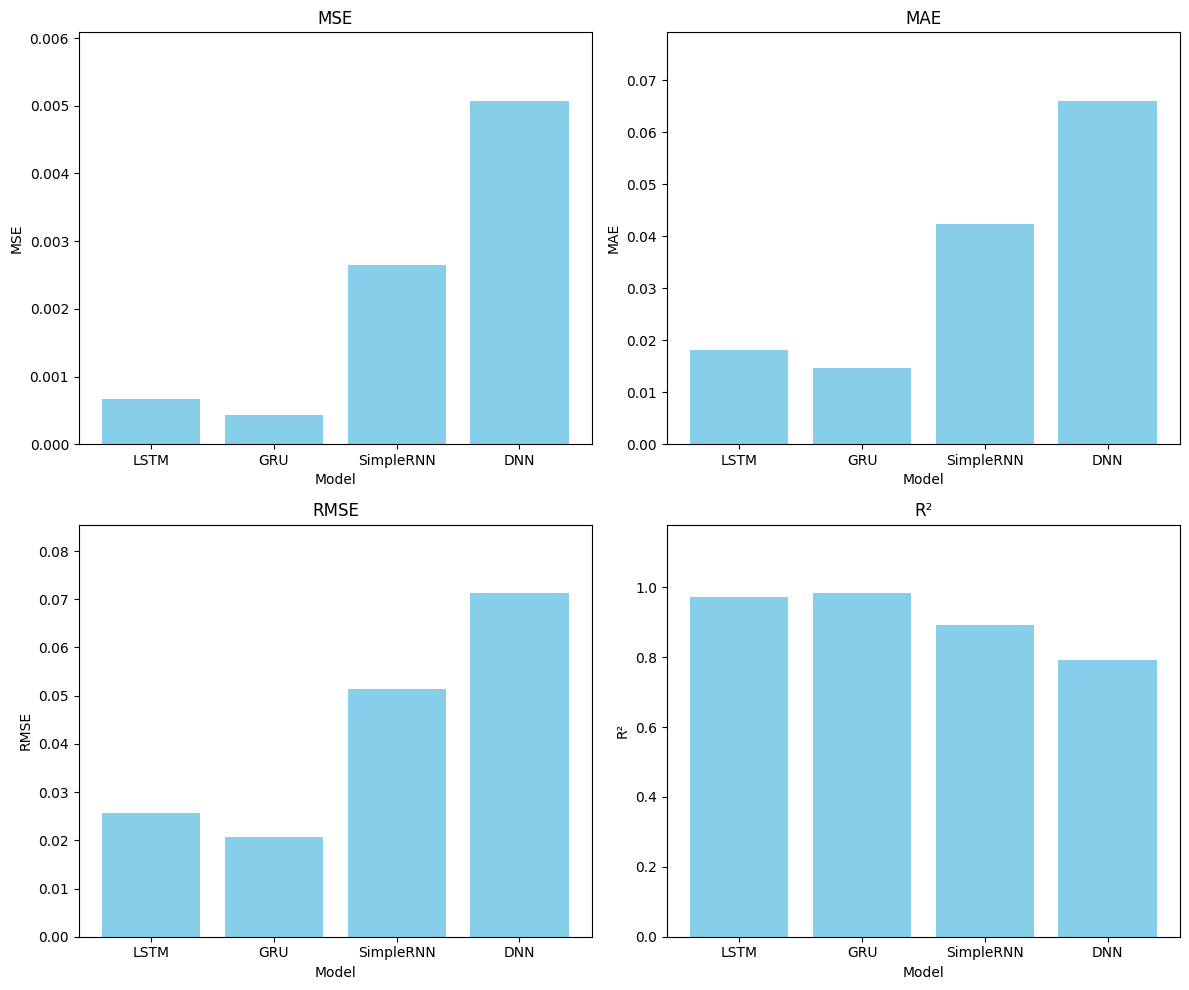

In [ ]:
# Plot bar charts for MSE, MAE, RMSE, and R²
metrics_names = ['MSE', 'MAE', 'RMSE', 'R²']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, metric in enumerate(metrics_names):
    ax = axes[i // 2, i % 2]  # Position in the subplot grid
    ax.bar(metrics_data['Model'], [metrics_data[metric][j] for j in range(len(models))], color='skyblue')
    ax.set_title(metric)
    ax.set_xlabel('Model')
    ax.set_ylabel(metric)
    ax.set_ylim([0, max(metrics_data[metric]) * 1.2])  # Scale for better visualization

plt.tight_layout()
plt.show()

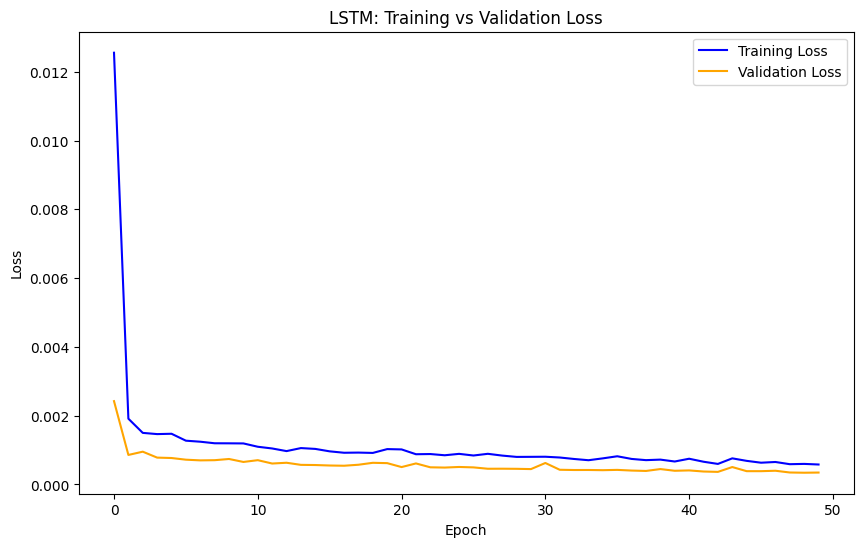

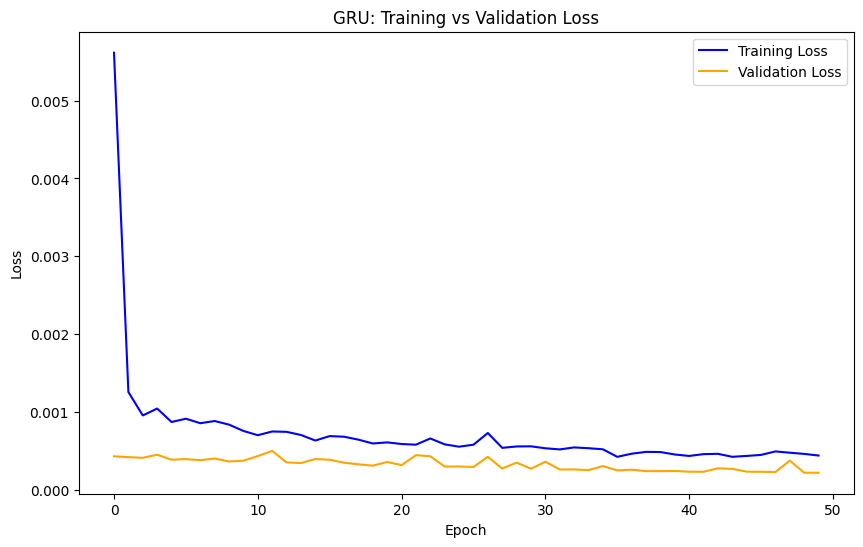

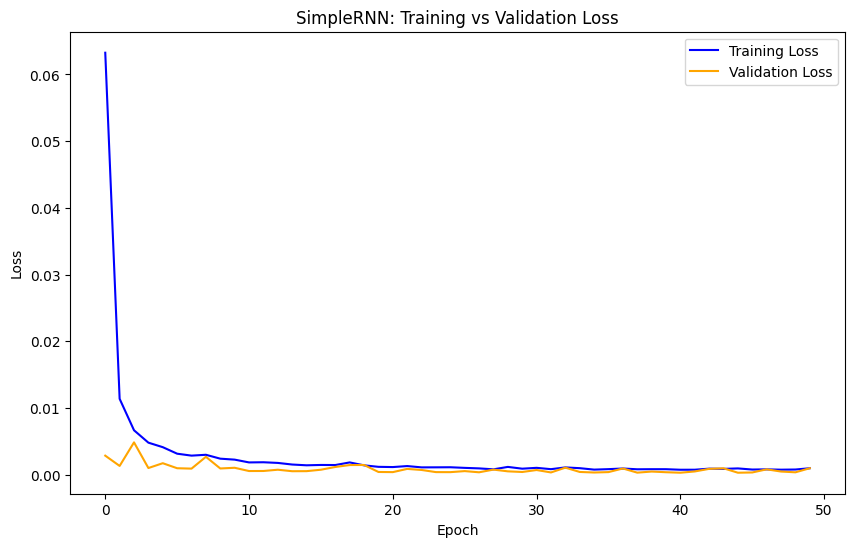

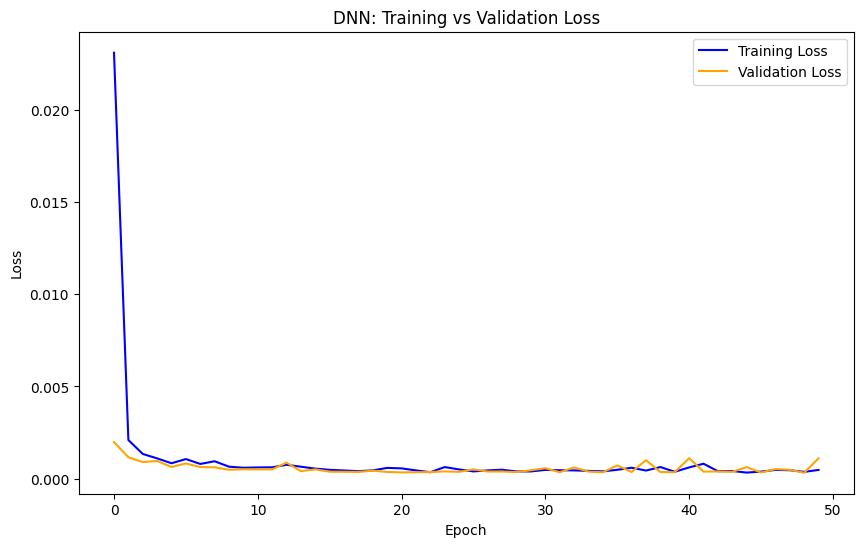

In [ ]:
import matplotlib.pyplot as plt

# Plot training vs validation loss for each model
for model_type in models:
    history = results[model_type]['history']
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
    plt.title(f"{model_type}: Training vs Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━

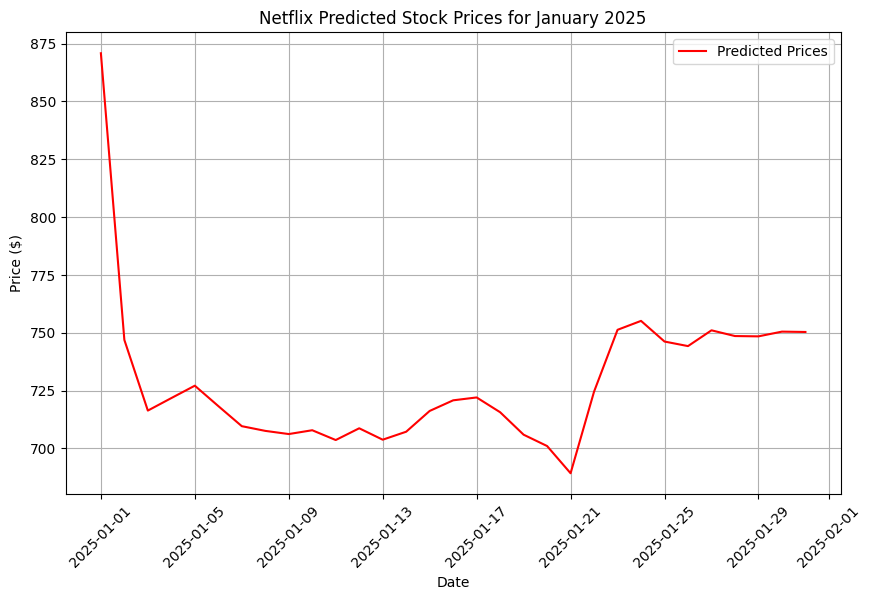

In [ ]:
future_dates = pd.date_range(start='2025-01-01', end='2025-01-31')
future_df = pd.DataFrame(index=future_dates)

# Get the last 'time_steps' data points
last_time_steps_data = scaled_features[-time_steps:]
last_time_steps_data = last_time_steps_data.reshape(1, time_steps, last_time_steps_data.shape[1])

january_2025_predictions = []
current_data = last_time_steps_data

for _ in range(len(future_dates)):
    prediction = results['GRU']['model'].predict(current_data)[0, 0]
    january_2025_predictions.append(prediction)

    current_data = np.roll(current_data, -1, axis=1)
    current_data[0, -1, 0] = prediction

january_2025_predictions = np.array(january_2025_predictions).reshape(-1, 1)

# Inverse transform the predictions
january_2025_prices = scaler_target.inverse_transform(january_2025_predictions)

for date, price in zip(future_dates, january_2025_prices):
    print(f"{date.date()}: ${price[0]:.2f}")

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(future_dates, january_2025_prices, label="Predicted Prices", color="red")
plt.title("Netflix Predicted Stock Prices for January 2025")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()
